## Importamos Librerias y Dataset

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [105]:
data  = pd.read_csv("train.csv")
data

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,['Erroll Garner'],I'll Remember April - Original Edited Concert ...,1955,0.923000,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,1955,0.0408,122.289,0.5460,24
1,2g8MTBFRUSFKbY5RQiSSEE,['Maison & Dragen'],Chinese New Year - Radio Edit,2014,0.000190,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,2014-05-02,0.0396,130.007,0.5160,0
2,2LcJoQ5SDUZrC2qUjWMEdF,"['Yoel Lerner', 'Mazi Cohen']",השפן הקטן,1981,0.900000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,1981-04-01,0.0577,83.244,0.8070,38
3,6RzHyUtRNARYyn2AIuoLnY,['Barbra Streisand'],Run Wild,1980,0.294000,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,1980-09-23,0.0268,82.302,0.1960,40
4,6Kd0I5es8911FZpYhFS053,['Willie Nelson'],Till I Gain Control Again - Live,1975,0.494000,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,1975,0.0283,77.854,0.2390,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129167,0ognkBvJqaov2gWDgaMzvz,['System Of A Down'],Nüguns,2002,0.000409,0.534,150360,0.891,0,0.000066,8,0.1010,-2.599,1,2002-11-26,0.0399,144.445,0.6820,49
129168,2B8TnS5nJijlzuORGs3RKy,['Taj Mahal'],She Caught the Katy and Left Me a Mule to Ride,1968,0.750000,0.572,208733,0.407,0,0.000037,3,0.0792,-11.610,1,1968,0.0563,207.425,0.8950,34
129169,5n5uyFpfopa4mNdSN0gTaH,['Macklemore & Ryan Lewis'],Wing$,2012,0.353000,0.400,298641,0.602,0,0.000000,7,0.1910,-6.988,0,2012-10-09,0.1970,74.142,0.0964,65
129170,0MrZG1nTNQVzeSJKi6gFVF,['Eagles'],The Last Resort - 2013 Remaster,1976,0.474000,0.549,444912,0.280,0,0.061200,7,0.1600,-10.692,1,1976-12-08,0.0311,125.830,0.2990,55


We generate a column called artist-song to better determine duplicate values

Generamos una columna llamada artista-cancion para determinar de mejor manera los valores duplicados

In [106]:
data["artista-cancion"]= data["artists"]+ " - " +data["name"]
data

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity,artista-cancion
0,7pQSmQ0l7QdBeL9X6CEMbH,['Erroll Garner'],I'll Remember April - Original Edited Concert ...,1955,0.923000,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,1955,0.0408,122.289,0.5460,24,['Erroll Garner'] - I'll Remember April - Orig...
1,2g8MTBFRUSFKbY5RQiSSEE,['Maison & Dragen'],Chinese New Year - Radio Edit,2014,0.000190,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,2014-05-02,0.0396,130.007,0.5160,0,['Maison & Dragen'] - Chinese New Year - Radio...
2,2LcJoQ5SDUZrC2qUjWMEdF,"['Yoel Lerner', 'Mazi Cohen']",השפן הקטן,1981,0.900000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,1981-04-01,0.0577,83.244,0.8070,38,"['Yoel Lerner', 'Mazi Cohen'] - השפן הקטן"
3,6RzHyUtRNARYyn2AIuoLnY,['Barbra Streisand'],Run Wild,1980,0.294000,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,1980-09-23,0.0268,82.302,0.1960,40,['Barbra Streisand'] - Run Wild
4,6Kd0I5es8911FZpYhFS053,['Willie Nelson'],Till I Gain Control Again - Live,1975,0.494000,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,1975,0.0283,77.854,0.2390,20,['Willie Nelson'] - Till I Gain Control Again ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129167,0ognkBvJqaov2gWDgaMzvz,['System Of A Down'],Nüguns,2002,0.000409,0.534,150360,0.891,0,0.000066,8,0.1010,-2.599,1,2002-11-26,0.0399,144.445,0.6820,49,['System Of A Down'] - Nüguns
129168,2B8TnS5nJijlzuORGs3RKy,['Taj Mahal'],She Caught the Katy and Left Me a Mule to Ride,1968,0.750000,0.572,208733,0.407,0,0.000037,3,0.0792,-11.610,1,1968,0.0563,207.425,0.8950,34,['Taj Mahal'] - She Caught the Katy and Left M...
129169,5n5uyFpfopa4mNdSN0gTaH,['Macklemore & Ryan Lewis'],Wing$,2012,0.353000,0.400,298641,0.602,0,0.000000,7,0.1910,-6.988,0,2012-10-09,0.1970,74.142,0.0964,65,['Macklemore & Ryan Lewis'] - Wing$
129170,0MrZG1nTNQVzeSJKi6gFVF,['Eagles'],The Last Resort - 2013 Remaster,1976,0.474000,0.549,444912,0.280,0,0.061200,7,0.1600,-10.692,1,1976-12-08,0.0311,125.830,0.2990,55,['Eagles'] - The Last Resort - 2013 Remaster


In [107]:
len(data["artists"].unique())

30429

In [108]:
len(data["name"].unique())

106371

In [109]:
sorted(list(data["year"].unique()))

[1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129172 entries, 0 to 129171
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                129172 non-null  object 
 1   artists           129172 non-null  object 
 2   name              129172 non-null  object 
 3   year              129172 non-null  int64  
 4   acousticness      129172 non-null  float64
 5   danceability      129172 non-null  float64
 6   duration_ms       129172 non-null  int64  
 7   energy            129172 non-null  float64
 8   explicit          129172 non-null  int64  
 9   instrumentalness  129172 non-null  float64
 10  key               129172 non-null  int64  
 11  liveness          129172 non-null  float64
 12  loudness          129172 non-null  float64
 13  mode              129172 non-null  int64  
 14  release_date      129172 non-null  object 
 15  speechiness       129172 non-null  float64
 16  tempo             12

In [111]:
len(data["artista-cancion"].unique())

121613

In [112]:
len(data["id"].unique())

129172

We investigate duplicate values ​​to see if they are duplicated in all columns or just in some

Investigamos los valores duplicados para ver si estan duplicados en todas las columnas o solo en algunas 

In [113]:
data[data.duplicated(subset='artista-cancion', keep=False)].sort_values(by="artista-cancion")


,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity,artista-cancion
30139,6ZCkhQPdBtUzZPkkO1o9cx,"[""'Til Tuesday""]",Coming Up Close,1986,0.18100,0.368,280000,0.473,0,0.000251,8,0.0665,-14.943,1,1986-11-04,0.0316,80.186,0.273,37,"[""'Til Tuesday""] - Coming Up Close"
11197,5tT4zCpwkEBC8Kmn1F3vFQ,"[""'Til Tuesday""]",Coming Up Close,1985,0.09890,0.349,280067,0.691,0,0.000216,8,0.0801,-7.592,1,1985,0.0329,80.065,0.199,27,"[""'Til Tuesday""] - Coming Up Close"
71641,2vyGjYndW7bP9Zn4a3yp85,"[""'Til Tuesday""]",Voices Carry,1981,0.00336,0.614,259907,0.628,0,0.000002,0,0.0853,-7.936,1,1981,0.0265,106.637,0.403,28,"[""'Til Tuesday""] - Voices Carry"
69958,0ZYf6N5eBeXStMri0mf3DZ,"[""'Til Tuesday""]",Voices Carry,1985,0.02820,0.583,263573,0.574,0,0.000002,0,0.1140,-9.044,1,1985-06-01,0.0239,104.995,0.578,56,"[""'Til Tuesday""] - Voices Carry"
127363,77vVnc2bE2aHMqvsWC4Tu9,"[""Anita O'Day"", 'Oscar Peterson Quartet']",Old Devil Moon,1957,0.89000,0.538,175667,0.306,0,0.000001,8,0.2320,-14.830,1,1957-01-01,0.0565,107.447,0.625,12,"[""Anita O'Day"", 'Oscar Peterson Quartet'] - Ol..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30846,4YU9RnKQhFOZ21wMZVrfDg,"['Édouard Lalo', 'Pierre Monteux', 'Yehudi Men...",Symphonie espagnole pour violon et orchestre i...,1945,0.89400,0.498,481720,0.286,0,0.772000,9,0.2340,-13.739,1,1945,0.0579,84.845,0.757,0,"['Édouard Lalo', 'Pierre Monteux', 'Yehudi Men..."
54269,1NeKXpvYHtLlTFy5vznfgE,['Αντώνης Διαμαντίδης'],Ο γέρο Νότης,1950,0.99200,0.419,195001,0.265,0,0.114000,9,0.1910,-8.521,1,1950-01-01,0.0546,97.771,0.336,0,['Αντώνης Διαμαντίδης'] - Ο γέρο Νότης
112417,6CBh5R8N4EblW2oeV8puh3,['Αντώνης Διαμαντίδης'],Ο γέρο Νότης,1930,0.99200,0.352,192800,0.191,0,0.065700,9,0.1160,-12.257,1,1930-01-01,0.1050,171.728,0.291,0,['Αντώνης Διαμαντίδης'] - Ο γέρο Νότης
78199,1AB7KF3a9N70Cl07OaIvya,['Γιώργος Μπάτης'],Ο θερμαστής,1950,0.92700,0.671,189053,0.640,0,0.012100,11,0.0969,-5.565,0,1950-01-01,0.0440,119.783,0.786,1,['Γιώργος Μπάτης'] - Ο θερμαστής


We eliminate duplicates

Eliminamos los duplicados

In [114]:
data_dupli=data.drop(labels="id", axis=1)
data_dupli[data_dupli.duplicated(keep=False, )]

,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity,artista-cancion
359,['J Balvin'],Reggaeton,2021,0.016500,0.747,158800,0.7400,0,0.000099,4,0.1010,-4.325,0,2021-01-22,0.1910,176.062,0.5520,0,['J Balvin'] - Reggaeton
557,"['Dmitry Kabalevsky', 'Vladimir Horowitz']","Sonata No. 3, Op. 46: III. Allegro giocoso",1928,0.992000,0.401,292800,0.2440,0,0.888000,1,0.0969,-20.262,1,1928,0.0331,132.142,0.2920,0,"['Dmitry Kabalevsky', 'Vladimir Horowitz'] - S..."
923,"['Chuckie & Promise Land', 'Amanda Wilson', 'B...",Breaking Up (feat. Amanda Wilson) - Original C...,2012,0.011700,0.618,378750,0.8510,0,0.204000,7,0.1840,-4.705,0,2012-12-18,0.0461,127.998,0.1130,0,"['Chuckie & Promise Land', 'Amanda Wilson', 'B..."
1233,"['Igor Stravinsky', 'Columbia Symphony Orchest...",L'Oiseau de feu: Danse de la suite de Kachtche...,1948,0.936000,0.381,49133,0.2780,0,0.920000,9,0.8600,-17.919,1,1948,0.0461,136.861,0.2830,0,"['Igor Stravinsky', 'Columbia Symphony Orchest..."
1278,"['Friedrich von Flotow', 'Richard Tucker', 'Em...","Martha: ""M'appari tutt'amor""",1949,0.922000,0.225,176920,0.2500,0,0.000002,5,0.5600,-12.145,1,1949,0.0374,98.509,0.1570,0,"['Friedrich von Flotow', 'Richard Tucker', 'Em..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128596,"['Alexander Scriabin', 'Vladimir Horowitz']","Sonata No. 3, Op. 23 in F-Sharp Minor: III. An...",1928,0.996000,0.278,288907,0.0049,0,0.932000,11,0.0954,-31.442,1,1928,0.0407,81.033,0.0606,0,"['Alexander Scriabin', 'Vladimir Horowitz'] - ..."
128646,"['Alexander Scriabin', 'Vladimir Horowitz']","Sonata No. 3, Op. 23 in F-Sharp Minor: II. All...",1928,0.996000,0.400,192627,0.0641,0,0.911000,5,0.0879,-21.151,0,1928,0.0341,82.566,0.0874,0,"['Alexander Scriabin', 'Vladimir Horowitz'] - ..."
128720,"['Franz Schubert', 'William Kapell']","18 German Dances and Ecossaises, D. 783: No. 7...",1945,0.995000,0.404,44707,0.1220,0,0.459000,10,0.0896,-19.706,1,1945,0.0514,137.046,0.4710,0,"['Franz Schubert', 'William Kapell'] - 18 Germ..."
128729,"['Peter Brown', 'Lucas Reyes']",Down & Dirty - Dub Mix,2013,0.000346,0.775,364440,0.8970,0,0.930000,9,0.0188,-6.512,0,2013-01-14,0.1030,128.007,0.6230,0,"['Peter Brown', 'Lucas Reyes'] - Down & Dirty ..."


In [115]:
data.columns

Index(['id', 'artists', 'name', 'year', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'release_date', 'speechiness', 'tempo',
       'valence', 'popularity', 'artista-cancion'],
      dtype='object')

In [116]:
data.drop_duplicates(inplace=True, subset=['artists', 'name', 'year', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'release_date', 'speechiness', 'tempo',
       'valence', 'popularity', 'artista-cancion'])
data

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity,artista-cancion
0,7pQSmQ0l7QdBeL9X6CEMbH,['Erroll Garner'],I'll Remember April - Original Edited Concert ...,1955,0.923000,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,1955,0.0408,122.289,0.5460,24,['Erroll Garner'] - I'll Remember April - Orig...
1,2g8MTBFRUSFKbY5RQiSSEE,['Maison & Dragen'],Chinese New Year - Radio Edit,2014,0.000190,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,2014-05-02,0.0396,130.007,0.5160,0,['Maison & Dragen'] - Chinese New Year - Radio...
2,2LcJoQ5SDUZrC2qUjWMEdF,"['Yoel Lerner', 'Mazi Cohen']",השפן הקטן,1981,0.900000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,1981-04-01,0.0577,83.244,0.8070,38,"['Yoel Lerner', 'Mazi Cohen'] - השפן הקטן"
3,6RzHyUtRNARYyn2AIuoLnY,['Barbra Streisand'],Run Wild,1980,0.294000,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,1980-09-23,0.0268,82.302,0.1960,40,['Barbra Streisand'] - Run Wild
4,6Kd0I5es8911FZpYhFS053,['Willie Nelson'],Till I Gain Control Again - Live,1975,0.494000,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,1975,0.0283,77.854,0.2390,20,['Willie Nelson'] - Till I Gain Control Again ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129167,0ognkBvJqaov2gWDgaMzvz,['System Of A Down'],Nüguns,2002,0.000409,0.534,150360,0.891,0,0.000066,8,0.1010,-2.599,1,2002-11-26,0.0399,144.445,0.6820,49,['System Of A Down'] - Nüguns
129168,2B8TnS5nJijlzuORGs3RKy,['Taj Mahal'],She Caught the Katy and Left Me a Mule to Ride,1968,0.750000,0.572,208733,0.407,0,0.000037,3,0.0792,-11.610,1,1968,0.0563,207.425,0.8950,34,['Taj Mahal'] - She Caught the Katy and Left M...
129169,5n5uyFpfopa4mNdSN0gTaH,['Macklemore & Ryan Lewis'],Wing$,2012,0.353000,0.400,298641,0.602,0,0.000000,7,0.1910,-6.988,0,2012-10-09,0.1970,74.142,0.0964,65,['Macklemore & Ryan Lewis'] - Wing$
129170,0MrZG1nTNQVzeSJKi6gFVF,['Eagles'],The Last Resort - 2013 Remaster,1976,0.474000,0.549,444912,0.280,0,0.061200,7,0.1600,-10.692,1,1976-12-08,0.0311,125.830,0.2990,55,['Eagles'] - The Last Resort - 2013 Remaster


## Analisis de los datos

### Cantidad de Registros por Año

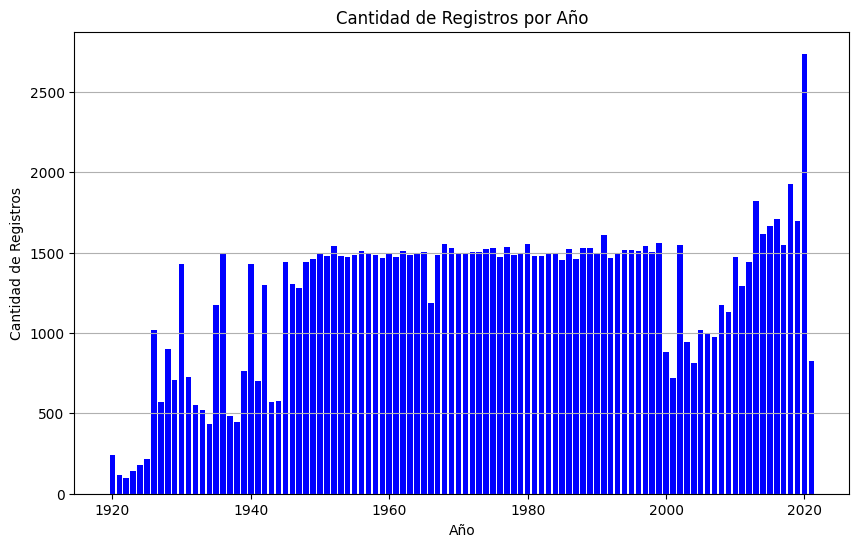

In [117]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (ancho, alto)
plt.bar(data.groupby("year").size().index, data.groupby("year").size().values, color='blue')
plt.xlabel('Año')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Año')
plt.grid(axis='y')  # Mostrar cuadrícula en el eje vertical (opcional)
plt.show()

### Cantidad de Registros por Acousticness

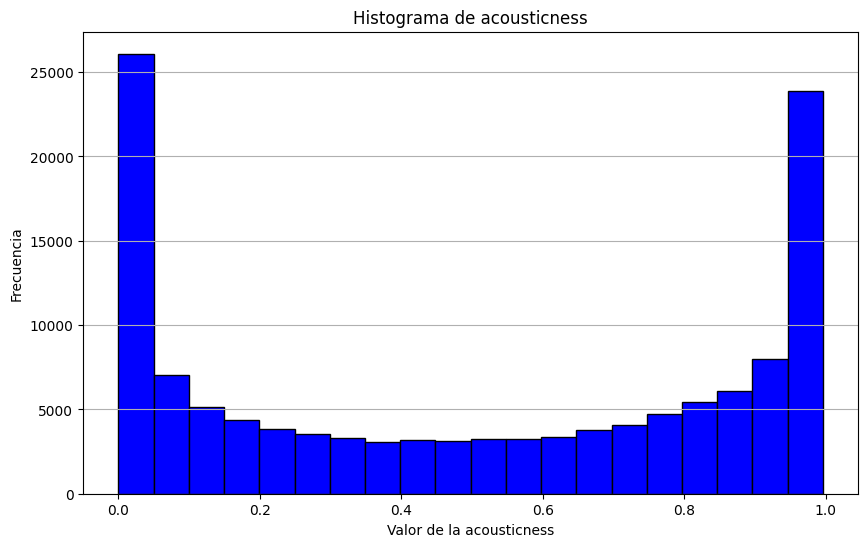

In [118]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (ancho, alto)
plt.hist(data["acousticness"], bins=20, color='blue', edgecolor='black')  # Número de bins ajustado según tus datos
plt.xlabel('Valor de la acousticness')
plt.ylabel('Frecuencia')
plt.title('Histograma de acousticness')
plt.grid(axis='y')  # Mostrar cuadrícula en el eje vertical (opcional)
plt.show()

### Cantidad de Registros por Danceability

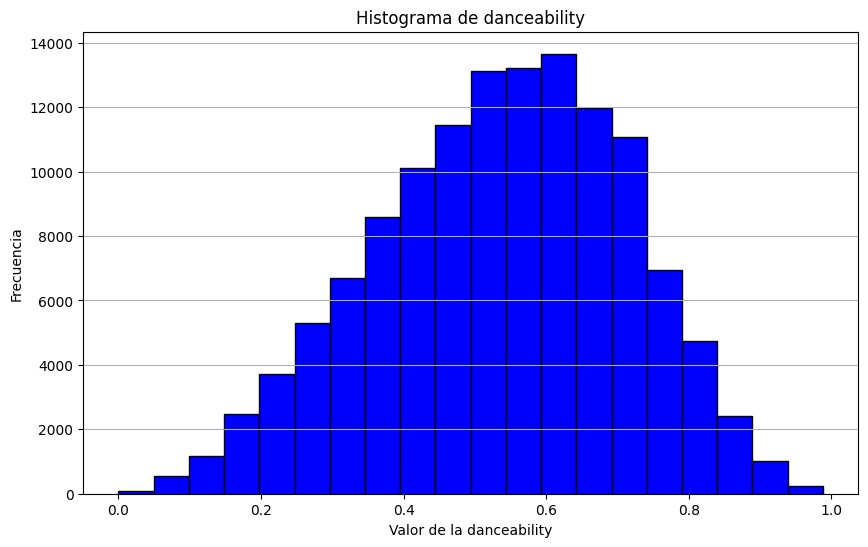

In [119]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (ancho, alto)
plt.hist(data["danceability"], bins=20, color='blue', edgecolor='black')  # Número de bins ajustado según tus datos
plt.xlabel('Valor de la danceability')
plt.ylabel('Frecuencia')
plt.title('Histograma de danceability')
plt.grid(axis='y')  # Mostrar cuadrícula en el eje vertical (opcional)
plt.show()

### Cantidad de Registros por Duration_ms

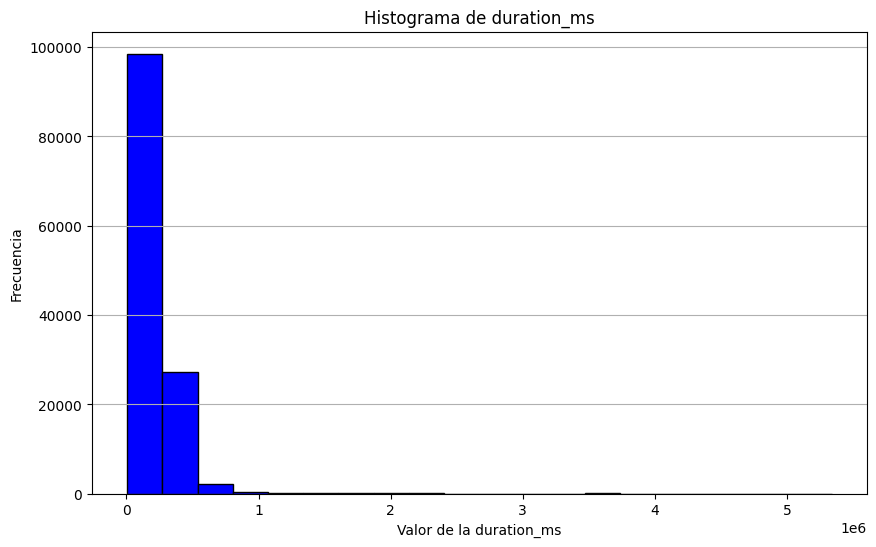

In [120]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (ancho, alto)
plt.hist(data["duration_ms"], bins=20, color='blue', edgecolor='black')  # Número de bins ajustado según tus datos
plt.xlabel('Valor de la duration_ms')
plt.ylabel('Frecuencia')
plt.title('Histograma de duration_ms')
plt.grid(axis='y')  # Mostrar cuadrícula en el eje vertical (opcional)
plt.show()

### Cantidad de Registros por Energy

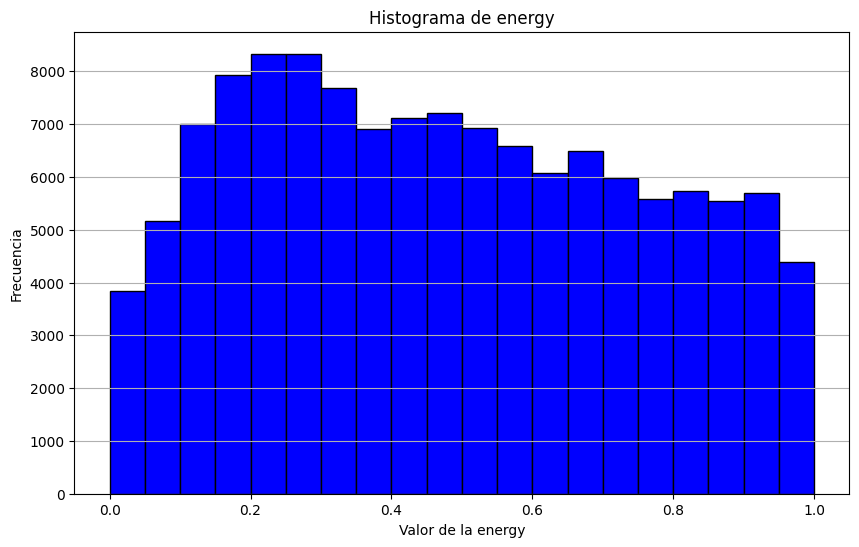

In [121]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (ancho, alto)
plt.hist(data["energy"], bins=20, color='blue', edgecolor='black')  # Número de bins ajustado según tus datos
plt.xlabel('Valor de la energy')
plt.ylabel('Frecuencia')
plt.title('Histograma de energy')
plt.grid(axis='y')  # Mostrar cuadrícula en el eje vertical (opcional)
plt.show()

### Cantidad de Registros por Explicit

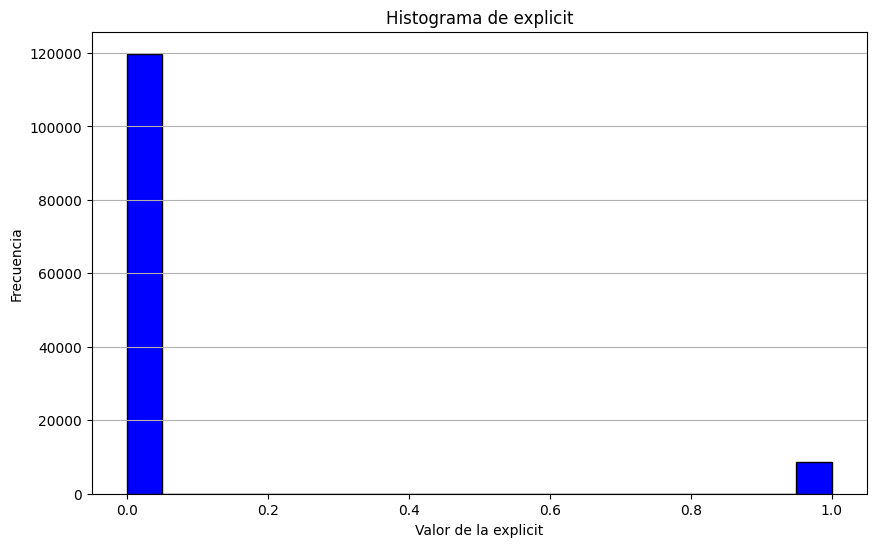

In [122]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (ancho, alto)
plt.hist(data["explicit"], bins=20, color='blue', edgecolor='black')  # Número de bins ajustado según tus datos
plt.xlabel('Valor de la explicit')
plt.ylabel('Frecuencia')
plt.title('Histograma de explicit')
plt.grid(axis='y')  # Mostrar cuadrícula en el eje vertical (opcional)
plt.show()

### Cantidad de Registros por Instrumentalness

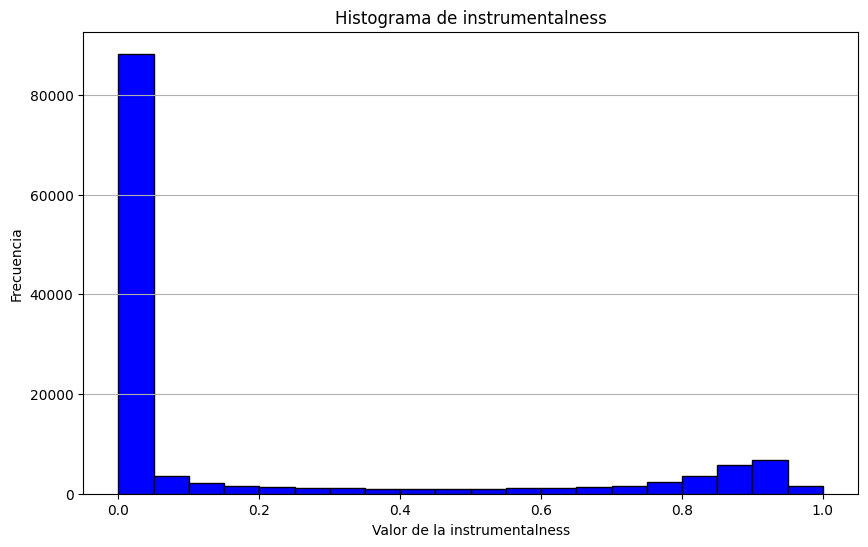

In [123]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (ancho, alto)
plt.hist(data["instrumentalness"], bins=20, color='blue', edgecolor='black')  # Número de bins ajustado según tus datos
plt.xlabel('Valor de la instrumentalness')
plt.ylabel('Frecuencia')
plt.title('Histograma de instrumentalness')
plt.grid(axis='y')  # Mostrar cuadrícula en el eje vertical (opcional)
plt.show()

### Cantidad de Registros por Keys

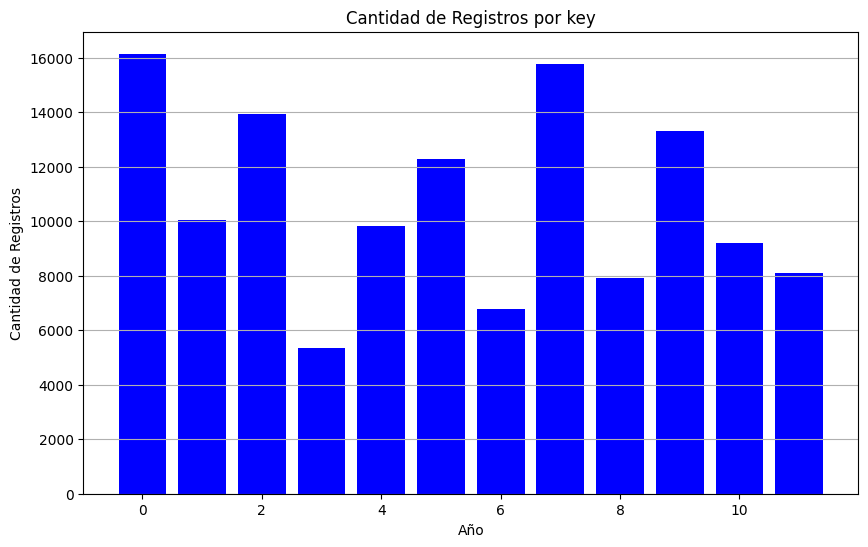

In [124]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (ancho, alto)
plt.bar(data.groupby("key").size().index, data.groupby("key").size().values, color='blue')
plt.xlabel('Año')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por key')
plt.grid(axis='y')  # Mostrar cuadrícula en el eje vertical (opcional)
plt.show()

### Cantidad de Registros por Liveness

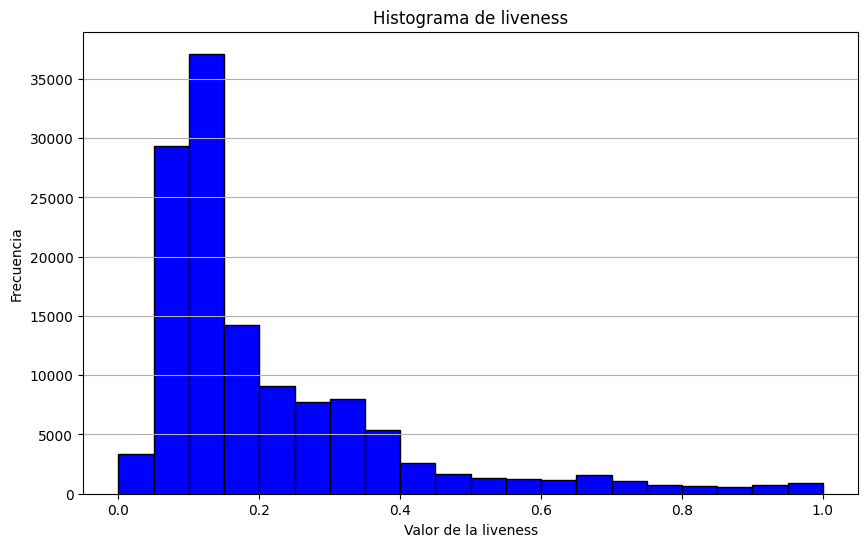

In [125]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (ancho, alto)
plt.hist(data["liveness"], bins=20, color='blue', edgecolor='black')  # Número de bins ajustado según tus datos
plt.xlabel('Valor de la liveness')
plt.ylabel('Frecuencia')
plt.title('Histograma de liveness')
plt.grid(axis='y')  # Mostrar cuadrícula en el eje vertical (opcional)
plt.show()

### Cantidad de Registros por Loudness

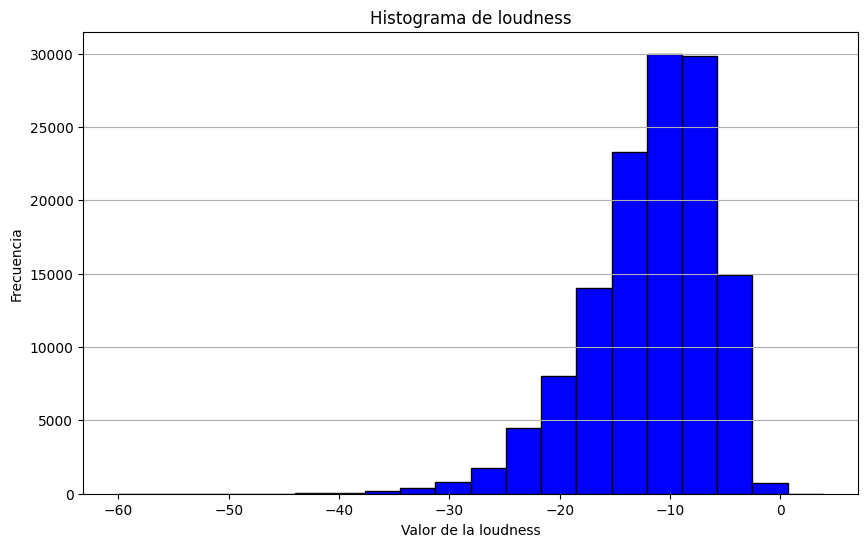

In [126]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (ancho, alto)
plt.hist(data["loudness"], bins=20, color='blue', edgecolor='black')  # Número de bins ajustado según tus datos
plt.xlabel('Valor de la loudness')
plt.ylabel('Frecuencia')
plt.title('Histograma de loudness')
plt.grid(axis='y')  # Mostrar cuadrícula en el eje vertical (opcional)
plt.show()

### Cantidad de Registros por Mode

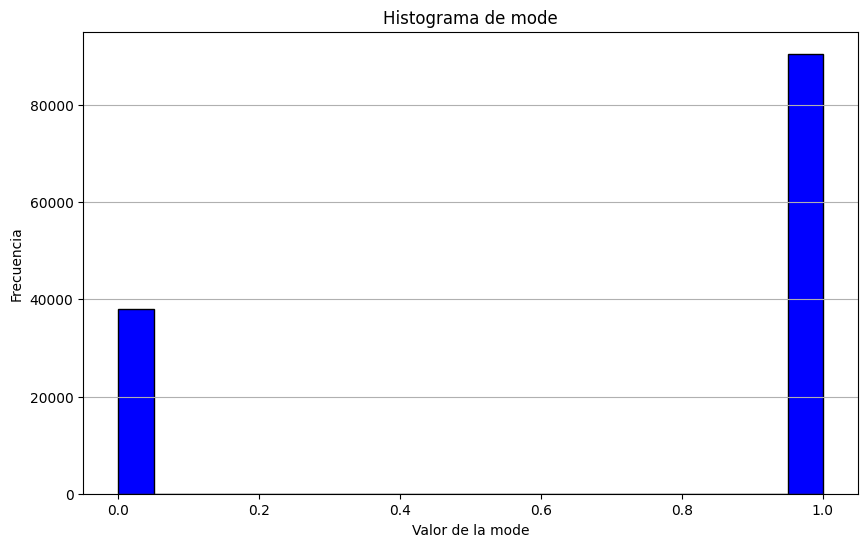

In [127]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (ancho, alto)
plt.hist(data["mode"], bins=20, color='blue', edgecolor='black')  # Número de bins ajustado según tus datos
plt.xlabel('Valor de la mode')
plt.ylabel('Frecuencia')
plt.title('Histograma de mode')
plt.grid(axis='y')  # Mostrar cuadrícula en el eje vertical (opcional)
plt.show()

### Cantidad de Registros por Speechiness

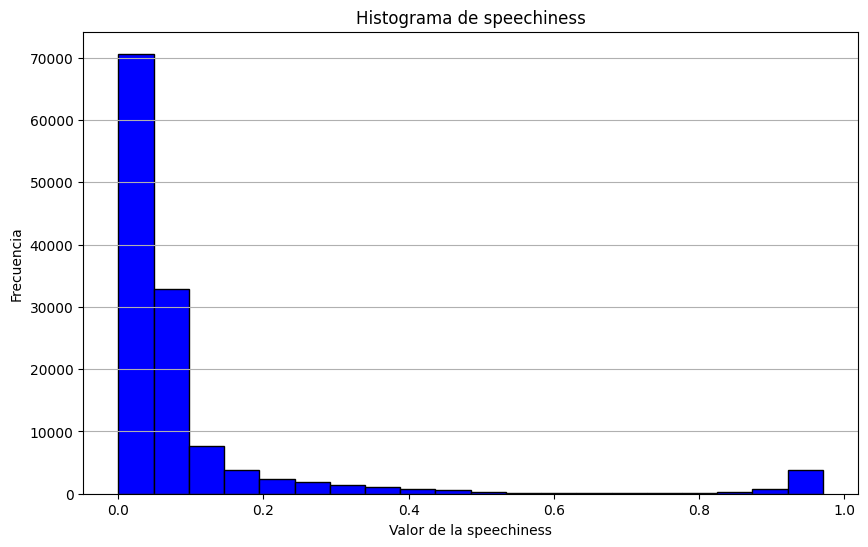

In [128]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (ancho, alto)
plt.hist(data["speechiness"], bins=20, color='blue', edgecolor='black')  # Número de bins ajustado según tus datos
plt.xlabel('Valor de la speechiness')
plt.ylabel('Frecuencia')
plt.title('Histograma de speechiness')
plt.grid(axis='y')  # Mostrar cuadrícula en el eje vertical (opcional)
plt.show()

### Cantidad de Registros por Tempo

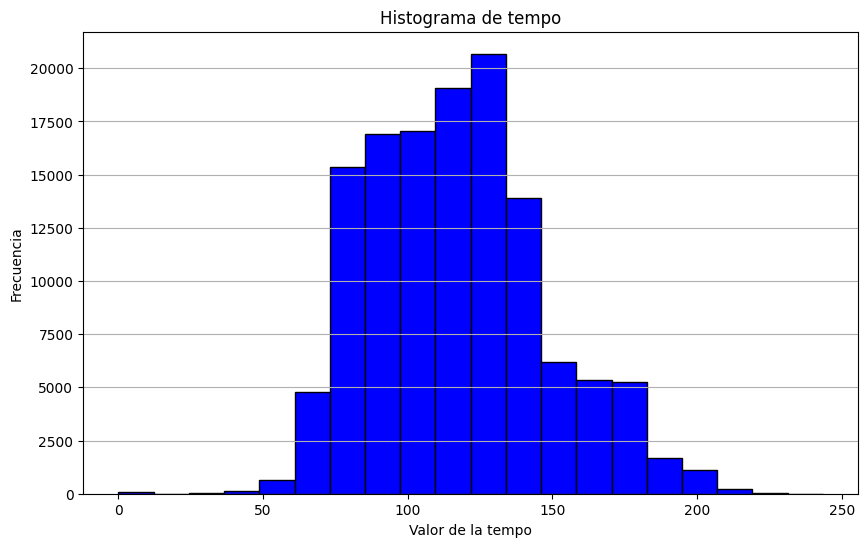

In [129]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (ancho, alto)
plt.hist(data["tempo"], bins=20, color='blue', edgecolor='black')  # Número de bins ajustado según tus datos
plt.xlabel('Valor de la tempo')
plt.ylabel('Frecuencia')
plt.title('Histograma de tempo')
plt.grid(axis='y')  # Mostrar cuadrícula en el eje vertical (opcional)
plt.show()

### Cantidad de Registros por Valence

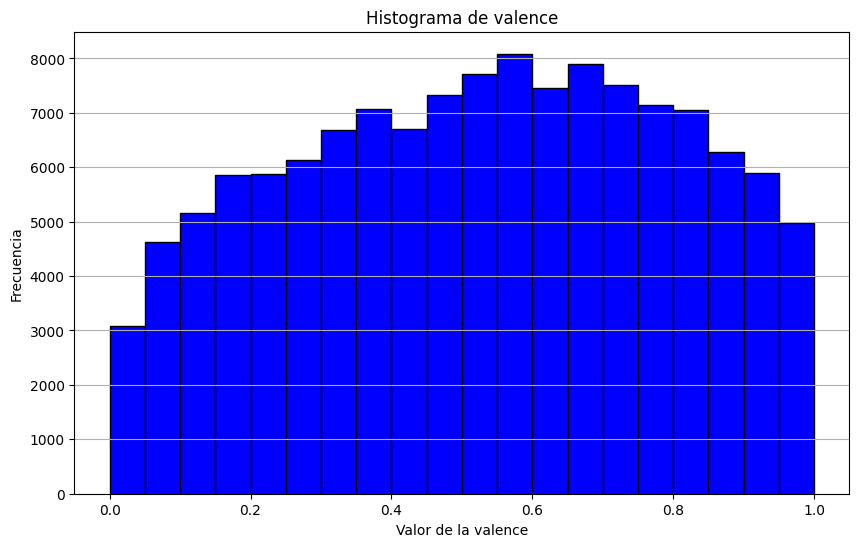

In [130]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (ancho, alto)
plt.hist(data["valence"], bins=20, color='blue', edgecolor='black')  # Número de bins ajustado según tus datos
plt.xlabel('Valor de la valence')
plt.ylabel('Frecuencia')
plt.title('Histograma de valence')
plt.grid(axis='y')  # Mostrar cuadrícula en el eje vertical (opcional)
plt.show()

### Cantidad de Registros por Popularitye

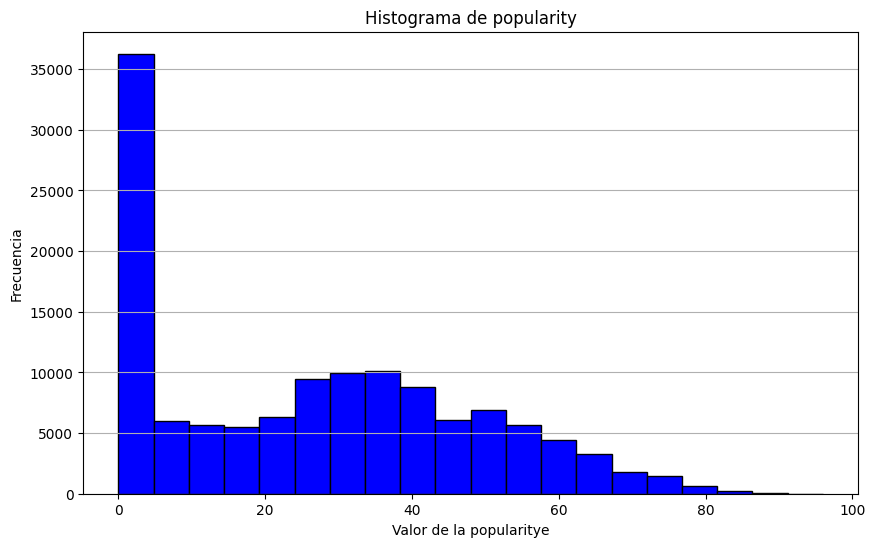

In [131]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (ancho, alto)
plt.hist(data["popularity"], bins=20, color='blue', edgecolor='black')  # Número de bins ajustado según tus datos
plt.xlabel('Valor de la popularitye')
plt.ylabel('Frecuencia')
plt.title('Histograma de popularity')
plt.grid(axis='y')  # Mostrar cuadrícula en el eje vertical (opcional)
plt.show()

## Calidad de datos

In [132]:
data.columns

Index(['id', 'artists', 'name', 'year', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'release_date', 'speechiness', 'tempo',
       'valence', 'popularity', 'artista-cancion'],
      dtype='object')

In [133]:
data.drop_duplicates(inplace=True, subset=['artists', 'name', 'year', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'release_date', 'speechiness', 'tempo',
       'valence', 'popularity', 'artista-cancion'])

In [134]:
fechas = data["release_date"].str.split("-",expand=True)

Since we have dates of different formats, we decided to generate three columns that are Year Month Day, where the missing values ​​will be taken as 0.

Al tener fechas de diferentes formatos decidimos generar tres columnas que sean Año Mes Dia, donde los valores faltantes se tomaran como 0.

In [135]:
fechas.isna()

,0,1,2
0,False,True,True
1,False,False,False
2,False,False,False
3,False,False,False
4,False,True,True
...,...,...,...
129167,False,False,False
129168,False,True,True
129169,False,False,False
129170,False,False,False


In [136]:
fechas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128553 entries, 0 to 129171
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       128553 non-null  object
 1   1       90698 non-null   object
 2   2       89505 non-null   object
dtypes: object(3)
memory usage: 3.9+ MB


In [137]:
fechas.loc[fechas.isna()[1]==True,1]="00"

In [138]:
fechas.loc[fechas.isna()[2]==True,2]="00"

In [139]:
fechas[0] = fechas[0].apply(lambda x: int(x))
fechas[1] = fechas[1].apply(lambda x: int(x))
fechas[2] = fechas[2].apply(lambda x: int(x))
fechas

,0,1,2
0,1955,0,0
1,2014,5,2
2,1981,4,1
3,1980,9,23
4,1975,0,0
...,...,...,...
129167,2002,11,26
129168,1968,0,0
129169,2012,10,9
129170,1976,12,8


In [140]:
data.drop("release_date", axis=1, inplace=True)

In [141]:
data.drop("id", axis=1, inplace=True)

Then we concatenate the "Fechas" dataset with the original to obtain it with the dates in the correct format

Despues concatenamos el dataset "Fechas" con el original para obtener el mismo con las fechas en el formato correcto

In [142]:
data = pd.concat([data,fechas], axis=1)

## Modelos

In [143]:
data

,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,...,loudness,mode,speechiness,tempo,valence,popularity,artista-cancion,0,1,2
0,['Erroll Garner'],I'll Remember April - Original Edited Concert ...,1955,0.923000,0.438,257693,0.602,0,0.658000,8,...,-14.565,1,0.0408,122.289,0.5460,24,['Erroll Garner'] - I'll Remember April - Orig...,1955,0,0
1,['Maison & Dragen'],Chinese New Year - Radio Edit,2014,0.000190,0.477,193968,0.834,0,0.978000,4,...,-6.534,0,0.0396,130.007,0.5160,0,['Maison & Dragen'] - Chinese New Year - Radio...,2014,5,2
2,"['Yoel Lerner', 'Mazi Cohen']",השפן הקטן,1981,0.900000,0.617,56827,0.272,0,0.000000,7,...,-16.818,1,0.0577,83.244,0.8070,38,"['Yoel Lerner', 'Mazi Cohen'] - השפן הקטן",1981,4,1
3,['Barbra Streisand'],Run Wild,1980,0.294000,0.377,247467,0.269,0,0.000478,4,...,-16.766,1,0.0268,82.302,0.1960,40,['Barbra Streisand'] - Run Wild,1980,9,23
4,['Willie Nelson'],Till I Gain Control Again - Live,1975,0.494000,0.501,351560,0.218,0,0.008110,0,...,-13.045,1,0.0283,77.854,0.2390,20,['Willie Nelson'] - Till I Gain Control Again ...,1975,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129167,['System Of A Down'],Nüguns,2002,0.000409,0.534,150360,0.891,0,0.000066,8,...,-2.599,1,0.0399,144.445,0.6820,49,['System Of A Down'] - Nüguns,2002,11,26
129168,['Taj Mahal'],She Caught the Katy and Left Me a Mule to Ride,1968,0.750000,0.572,208733,0.407,0,0.000037,3,...,-11.610,1,0.0563,207.425,0.8950,34,['Taj Mahal'] - She Caught the Katy and Left M...,1968,0,0
129169,['Macklemore & Ryan Lewis'],Wing$,2012,0.353000,0.400,298641,0.602,0,0.000000,7,...,-6.988,0,0.1970,74.142,0.0964,65,['Macklemore & Ryan Lewis'] - Wing$,2012,10,9
129170,['Eagles'],The Last Resort - 2013 Remaster,1976,0.474000,0.549,444912,0.280,0,0.061200,7,...,-10.692,1,0.0311,125.830,0.2990,55,['Eagles'] - The Last Resort - 2013 Remaster,1976,12,8


In [144]:
from sklearn.model_selection import train_test_split
X = data.drop(["popularity","name"], axis=1)  # Features (variables independientes)
y = data["popularity"]  # Target (variable dependiente)

We apply Label encoder to obtain a value about the artist who generated the song

Aplicamos Label encoder para obtener un valor sobre el artista que genero la cancion

In [145]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['artists_encoded'] = label_encoder.fit_transform(X['artists'])

In [146]:
X.columns = [         'artists',             'year',     'acousticness',
           'danceability',      'duration_ms',           'energy',
               'explicit', 'instrumentalness',              'key',
               'liveness',         'loudness',             'mode',
            'speechiness',            'tempo',          'valence',
        'artista-cancion',                  'Year',                  'Month',
                        'Day',  'artists_encoded']

In [147]:
X = X.drop(["artists","artista-cancion"], axis=1)

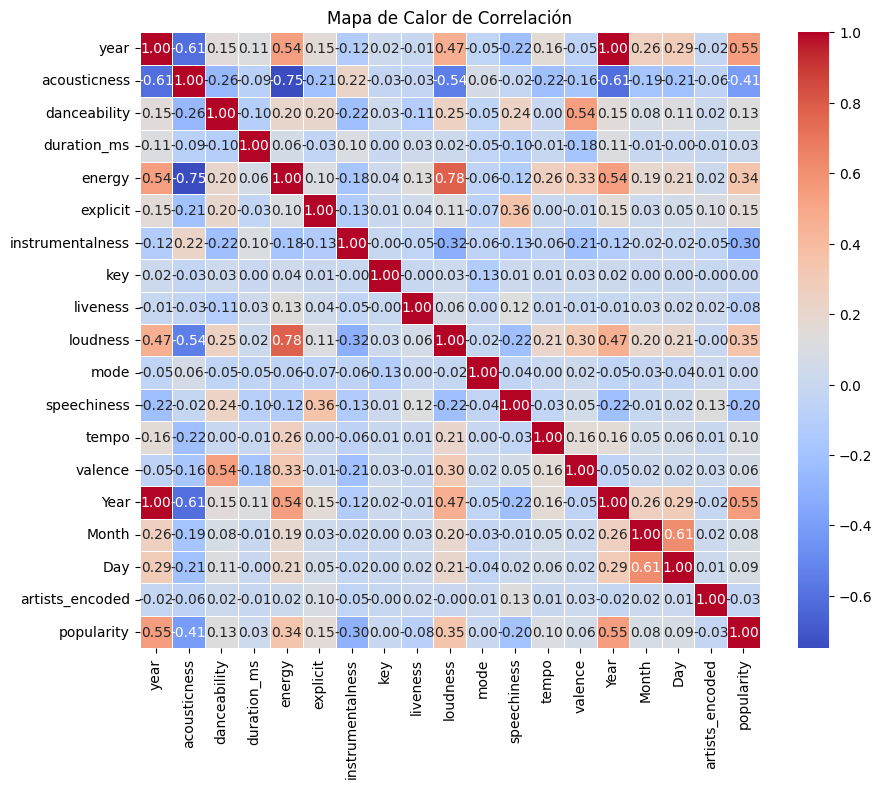

In [148]:
correlation_matrix = pd.concat([X,y],axis=1).corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))  # Tamaño del gráfico (ancho, alto)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [150]:
y_train

45930      1
18003      0
75445     49
82028     44
59953      0
          ..
128723    24
104101    37
860        0
15806      0
122523     0
Name: popularity, Length: 115697, dtype: int64

We decided to apply different models in their complexity, in this way to have more variety to choose the best model.

Decidimos aplicar diferentes modelos en su complejidad, de esta forma tener mas variedad para elegir el mejor modelo

### Regrsion Lineal

In [214]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 17.078904204173522
Coeficiente de determinación (R^2): 0.39311768461226415


Obtaining a first result, we decided to apply data normalization using StandardScaler. In addition to carrying out an analysis of the different
columns, resulting in the best results coming from using all the columns. We also optimize the hyperparameters to obtain the best possible result from this type of model.

Obteniendo un primer resultado, decidimos aplicar la noramlizacion de los datos usando StandarScaler. Ademas de realizar un analizis de las diferentes 
columnas obteniendo como resultado que los mejores resultados provinen de usar todas las columnas. Tambien hacemos la optimizacion de los hiperparametros para obtener el mejor resultado posible de este tipo de modelo.

In [151]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [213]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 17.078590012258502
Coeficiente de determinación (R^2): 0.3931400134175185


In [221]:
from sklearn.feature_selection import SelectKBest, f_regression

for i in range(3,19,2):
    # Seleccionar las mejores características basadas en puntuaciones F
    selector = SelectKBest(score_func=f_regression, k=i)  # Selecciona las mejores 3 características
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Crear un modelo de regresión lineal
    model = LinearRegression()

    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train_selected, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_selected)

    # Evaluar el rendimiento del modelo
    mse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"Cantidad de columnas: {i}")
    print(f"Error cuadrático medio (MSE): {mse}")
    print(f"Coeficiente de determinación (R^2): {r2}")
    print("\n")

Cantidad de columnas: 3
Error cuadrático medio (MSE): 18.326799613979563
Coeficiente de determinación (R^2): 0.3011922067059247


Cantidad de columnas: 5
Error cuadrático medio (MSE): 18.162328563154276
Coeficiente de determinación (R^2): 0.31367861211070147


Cantidad de columnas: 7
Error cuadrático medio (MSE): 17.404426990141005
Coeficiente de determinación (R^2): 0.3697629420619679


Cantidad de columnas: 9
Error cuadrático medio (MSE): 17.229927654946678
Coeficiente de determinación (R^2): 0.38233728653242005


Cantidad de columnas: 11
Error cuadrático medio (MSE): 17.19431656256495
Coeficiente de determinación (R^2): 0.38488783856191633


Cantidad de columnas: 13
Error cuadrático medio (MSE): 17.112972964551503
Coeficiente de determinación (R^2): 0.39069406893287995


Cantidad de columnas: 15
Error cuadrático medio (MSE): 17.078093500643146
Coeficiente de determinación (R^2): 0.3931752983739587


Cantidad de columnas: 17
Error cuadrático medio (MSE): 17.077421108256498
Coeficient

In [153]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression


model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")


Error cuadrático medio (MSE): 13.541260771542975
Coeficiente de determinación (R^2): 0.6184928511410813


Realizamos el cross validation para obtener un valor confiable del error obtenido

In [231]:
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

# Realizar validación cruzada y obtener las predicciones
y_pred_cv = cross_val_predict(model, X_train_scaled, y_train, cv=5)

# Calcular el RMSE a partir de las predicciones y los valores reales
rmse = np.sqrt(mean_squared_error(y_train, y_pred_cv))

print(f"RMSE durante la validación cruzada: {rmse}")

RMSE durante la validación cruzada: 13.63169613895124


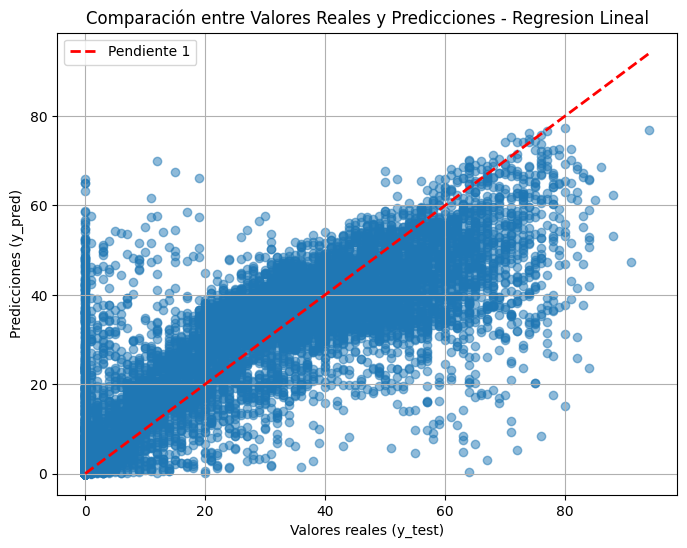

In [160]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_pred)')
plt.title('Comparación entre Valores Reales y Predicciones - Regresion Lineal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Pendiente 1')
plt.legend()

plt.grid(True)
plt.show()

### Regresión de Bosque Aleatorio (Random Forest Regression)

In [156]:
from sklearn.ensemble import RandomForestRegressor

In the second model we apply a Random Forest, where first we apply a base model and then we optimize the hyperparameters

En el segundo modelo aplicadmos un Random Forest, donde primero aplicamos un modelo base y despues vamos optimizando los hipeparametros

In [234]:
# Crear un modelo de regresión de Bosque Aleatorio
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred, squared=False))
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 135.92102822020317
Coeficiente de determinación (R^2): 0.7172053895244128


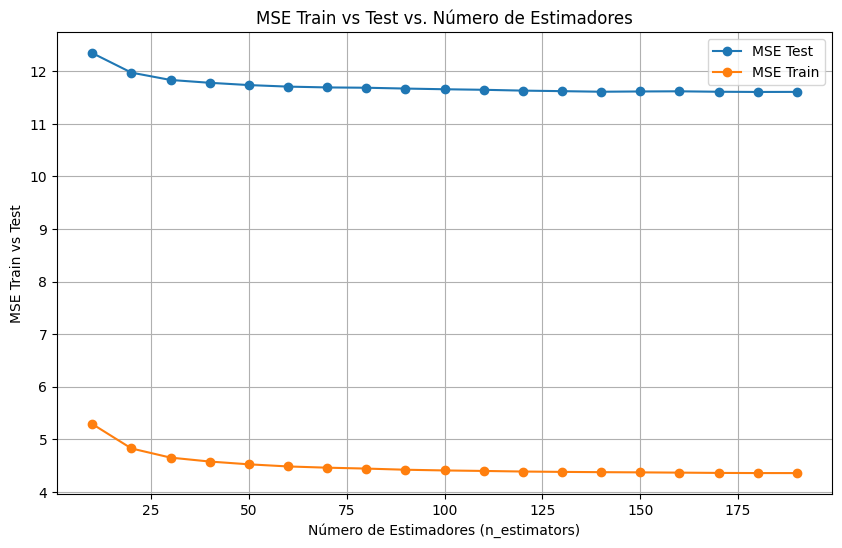

In [238]:
from sklearn.ensemble import RandomForestRegressor
r2_list_test=list()
mse_list_test=list()
r2_list_train=list()
mse_list_train=list()

for i in range(10,200,10):
    # Crear una instancia del modelo de Random Forest
    rf_model = RandomForestRegressor(n_estimators=i, 
                                     random_state=42)

    # Ajustar el modelo con los datos de entrenamiento
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred, squared=False)
    mse_list_test.append(mse)
    r2 = r2_score(y_test, y_pred)
    r2_list_test.append(r2)

    y_train2 = rf_model.predict(X_train)
    mse = mean_squared_error(y_train, y_train2, squared=False)
    mse_list_train.append(mse)
    r2 = r2_score(y_train, y_train2)
    r2_list_train.append(r2)

plt.figure(figsize=(10, 6))
plt.plot(range(10,200,10), mse_list_test, label='MSE Test', marker='o')
plt.plot(range(10,200,10), mse_list_train, label='MSE Train', marker='o')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('MSE Train vs Test')
plt.title('MSE Train vs Test vs. Número de Estimadores')
plt.legend()
plt.grid(True)
plt.show()

In [239]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# Crear una instancia del modelo Gradient Boosting Regressor
rf_model = RandomForestRegressor(n_estimators=50 ,random_state=42)

# Definir los hiperparámetros y sus posibles valores para la búsqueda
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [2, 4, 8]
}

# Definir la métrica a optimizar (por ejemplo, MSE)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(rf_model, param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Hacer predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = best_model.score(X_test, y_test)

print("Mejores hiperparámetros:", best_params)
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Error cuadrático medio (MSE): 11.72009064386851
Coeficiente de determinación (R²): 0.7142104015394384


In [157]:
# Crear un modelo de regresión de Bosque Aleatorio
model = RandomForestRegressor(n_estimators=100, max_depth = 20 , min_samples_leaf = 2, min_samples_split = 2, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 11.662691075140884
Coeficiente de determinación (R^2): 0.717002876463809


In [242]:
from sklearn.model_selection import cross_val_score

# Realiza validación cruzada
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcula el RMSE promedio a partir de los puntajes de validación cruzada
rmse_scores = np.sqrt(-scores)  # Cambia el signo y aplica la raíz cuadrada
mean_rmse = rmse_scores.mean()
mean_rmse

11.797757200642426

For this model, after cross validation we obtain a better result than in Linear Regression.

Para este modelo despues del cross validation obtenemos un mejor resultado que en la Regression Lineal.

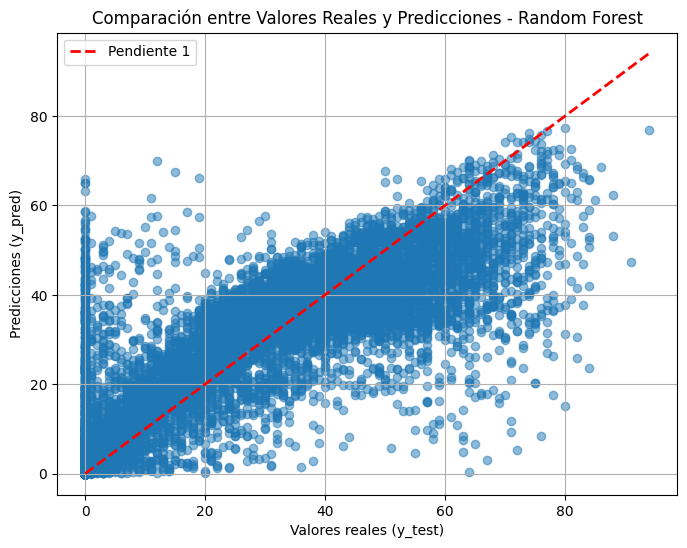

In [161]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_pred)')
plt.title('Comparación entre Valores Reales y Predicciones - Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Pendiente 1')
plt.legend()

plt.grid(True)
plt.show()

### Gradient Boosting Regression

In [162]:
from sklearn.ensemble import GradientBoostingRegressor

We repeat the process for Gradient Boosting Regression. First we apply a base model and then we optimize the hyperameters and then apply cross validation

Repetimos el proceso para Gradient Boosting Regression. Primero aplicamos un modelo base y despues vamos optimizando los hiperametros para despues aplicar una validacion cruzada

In [245]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 13.193233910393069
Coeficiente de determinación (R^2): 0.6378512405392288


In [247]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# Crear una instancia del modelo Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Definir los hiperparámetros y sus posibles valores para la búsqueda
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [2, 4, 8],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Definir la métrica a optimizar (por ejemplo, MSE)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Hacer predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = best_model.score(X_test, y_test)

print("Mejores hiperparámetros:", best_params)
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

Mejores hiperparámetros: {'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 20}
Error cuadrático medio (MSE): 11.18451274165466
Coeficiente de determinación (R²): 0.7397332947260006


In [163]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, max_depth = 10 , min_samples_leaf = 8, min_samples_split = 20,random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 11.18451274165466
Coeficiente de determinación (R^2): 0.7397332947260006


We observe that for now this model gives us the best result

Observamos que por ahora este modelo nos entrega el mejor resultado

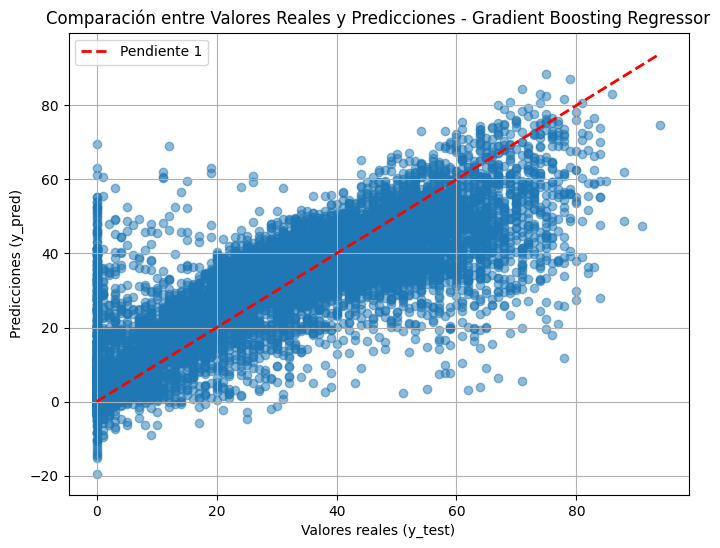

In [165]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_pred)')
plt.title('Comparación entre Valores Reales y Predicciones - Gradient Boosting Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Pendiente 1')
plt.legend()

plt.grid(True)
plt.show()

## Deep Learning

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [167]:
# Normalizar los datos (opcional, pero a menudo beneficioso para redes neuronales)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


We generate neural networks, first a basic network with two layers, and then analyze more complex models.

Generamos redes neuronales, primero una red basica con dos capas, para despues analizar modelos mas complejos. 

In [52]:
# Crear un modelo de Red Neuronal Artificial
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 12.667482167789036
Coeficiente de determinación (R^2): 0.6661394685717407


c:\Users\Nacho\anaconda3\envs\Proyecto_Forex\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [53]:
# Crear un modelo de Red Neuronal Artificial
model = MLPRegressor(hidden_layer_sizes=(500, 200, 100, 50), activation='relu', solver='adam', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 14.39115268701302
Coeficiente de determinación (R^2): 0.5691008483022639


c:\Users\Nacho\anaconda3\envs\Proyecto_Forex\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

# Define los hiperparámetros que deseas explorar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (200, 100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Crea un modelo MLPRegressor
model = MLPRegressor(random_state=42)

# Realiza la búsqueda en cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=4)
grid_search.fit(X_train, y_train)

# Encuentra la mejor combinación de hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Mejor modelo {best_params}")
print(f"Mejores parametros {best_params}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejor modelo {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}
Mejores parametros {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}


c:\Users\Nacho\anaconda3\envs\Proyecto_Forex\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [168]:
# Crear un modelo de Red Neuronal Artificial
model = MLPRegressor(hidden_layer_sizes=(50, 50), activation='tanh', alpha=0.01 ,solver='adam', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 12.469030560698869
Coeficiente de determinación (R^2): 0.6765181964152048


c:\Users\Nacho\anaconda3\envs\Proyecto_Forex\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor

# Crea un modelo MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(50, 50), activation='tanh', alpha=0.01 ,solver='adam', random_state=42)

# Realiza validación cruzada
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcula el error cuadrático medio (MSE) promedio
mean_mse = -scores.mean()
print(mean_mse)

# Entrena el modelo final con los datos de entrenamiento
model.fit(X_train, y_train)

# Realiza predicciones y evalúa el modelo
y_pred = model.predict(X_test)

c:\Users\Nacho\anaconda3\envs\Proyecto_Forex\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Nacho\anaconda3\envs\Proyecto_Forex\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Nacho\anaconda3\envs\Proyecto_Forex\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Nacho\anaconda3\envs\Proyecto_Forex\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

158.87657255555243


c:\Users\Nacho\anaconda3\envs\Proyecto_Forex\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [169]:
mse = mean_squared_error(y_test, y_pred, squared=False)
print(mse)
r2 = r2_score(y_test, y_pred)
print(r2)

12.469030560698869
0.6765181964152048


Despues de realizar la validacion cruzada observamos un valor mayor a lo obtenido anteriormente

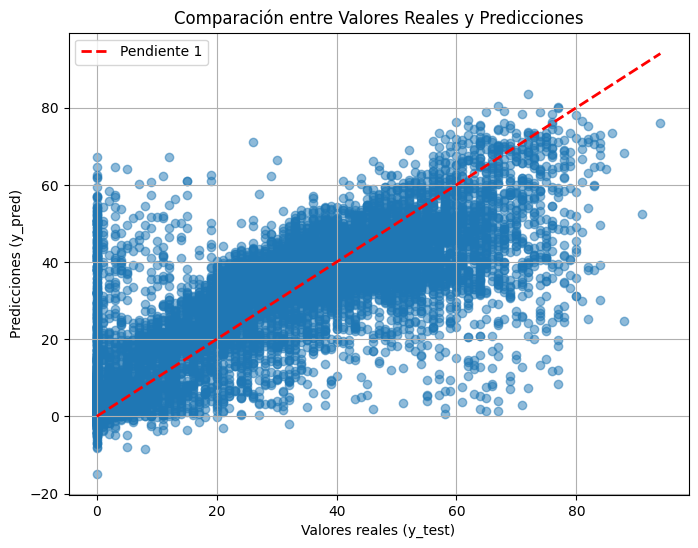

In [170]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_pred)')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Pendiente 1')
plt.legend()

plt.grid(True)
plt.show()

## Mejores modelos

With the best hyperparameters of each model, we generate a complete dataset, without separating between train and test. So that the model we enter is with the greatest amount of data possible.

Con los mejores hiperparametros de cada modelo, generamos un dataset completo, sin separar entre train y test. Para que el modelo que entremos sea con la mayor cantidad de datos posibles.

### Armamos el dataset train

In [173]:
train = pd.read_csv("train.csv")
train

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,['Erroll Garner'],I'll Remember April - Original Edited Concert ...,1955,0.923000,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,1955,0.0408,122.289,0.5460,24
1,2g8MTBFRUSFKbY5RQiSSEE,['Maison & Dragen'],Chinese New Year - Radio Edit,2014,0.000190,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,2014-05-02,0.0396,130.007,0.5160,0
2,2LcJoQ5SDUZrC2qUjWMEdF,"['Yoel Lerner', 'Mazi Cohen']",השפן הקטן,1981,0.900000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,1981-04-01,0.0577,83.244,0.8070,38
3,6RzHyUtRNARYyn2AIuoLnY,['Barbra Streisand'],Run Wild,1980,0.294000,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,1980-09-23,0.0268,82.302,0.1960,40
4,6Kd0I5es8911FZpYhFS053,['Willie Nelson'],Till I Gain Control Again - Live,1975,0.494000,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,1975,0.0283,77.854,0.2390,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129167,0ognkBvJqaov2gWDgaMzvz,['System Of A Down'],Nüguns,2002,0.000409,0.534,150360,0.891,0,0.000066,8,0.1010,-2.599,1,2002-11-26,0.0399,144.445,0.6820,49
129168,2B8TnS5nJijlzuORGs3RKy,['Taj Mahal'],She Caught the Katy and Left Me a Mule to Ride,1968,0.750000,0.572,208733,0.407,0,0.000037,3,0.0792,-11.610,1,1968,0.0563,207.425,0.8950,34
129169,5n5uyFpfopa4mNdSN0gTaH,['Macklemore & Ryan Lewis'],Wing$,2012,0.353000,0.400,298641,0.602,0,0.000000,7,0.1910,-6.988,0,2012-10-09,0.1970,74.142,0.0964,65
129170,0MrZG1nTNQVzeSJKi6gFVF,['Eagles'],The Last Resort - 2013 Remaster,1976,0.474000,0.549,444912,0.280,0,0.061200,7,0.1600,-10.692,1,1976-12-08,0.0311,125.830,0.2990,55


In [174]:
from sklearn.model_selection import train_test_split
train = train.drop(["id","name"], axis=1)  # Features (variables independientes
train

,artists,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,['Erroll Garner'],1955,0.923000,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,1955,0.0408,122.289,0.5460,24
1,['Maison & Dragen'],2014,0.000190,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,2014-05-02,0.0396,130.007,0.5160,0
2,"['Yoel Lerner', 'Mazi Cohen']",1981,0.900000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,1981-04-01,0.0577,83.244,0.8070,38
3,['Barbra Streisand'],1980,0.294000,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,1980-09-23,0.0268,82.302,0.1960,40
4,['Willie Nelson'],1975,0.494000,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,1975,0.0283,77.854,0.2390,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129167,['System Of A Down'],2002,0.000409,0.534,150360,0.891,0,0.000066,8,0.1010,-2.599,1,2002-11-26,0.0399,144.445,0.6820,49
129168,['Taj Mahal'],1968,0.750000,0.572,208733,0.407,0,0.000037,3,0.0792,-11.610,1,1968,0.0563,207.425,0.8950,34
129169,['Macklemore & Ryan Lewis'],2012,0.353000,0.400,298641,0.602,0,0.000000,7,0.1910,-6.988,0,2012-10-09,0.1970,74.142,0.0964,65
129170,['Eagles'],1976,0.474000,0.549,444912,0.280,0,0.061200,7,0.1600,-10.692,1,1976-12-08,0.0311,125.830,0.2990,55


In [175]:
fechas = train["release_date"].str.split("-",expand=True)

In [176]:
fechas.isna()

,0,1,2
0,False,True,True
1,False,False,False
2,False,False,False
3,False,False,False
4,False,True,True
...,...,...,...
129167,False,False,False
129168,False,True,True
129169,False,False,False
129170,False,False,False


In [177]:
fechas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129172 entries, 0 to 129171
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       129172 non-null  object
 1   1       91038 non-null   object
 2   2       89845 non-null   object
dtypes: object(3)
memory usage: 3.0+ MB


In [178]:
fechas.loc[fechas.isna()[1]==True,1]="00"

In [179]:
fechas.loc[fechas.isna()[2]==True,2]="00"

In [180]:
fechas[0] = fechas[0].apply(lambda x: int(x))
fechas[1] = fechas[1].apply(lambda x: int(x))
fechas[2] = fechas[2].apply(lambda x: int(x))
fechas

,0,1,2
0,1955,0,0
1,2014,5,2
2,1981,4,1
3,1980,9,23
4,1975,0,0
...,...,...,...
129167,2002,11,26
129168,1968,0,0
129169,2012,10,9
129170,1976,12,8


In [181]:
train.drop("release_date", axis=1, inplace=True)

In [182]:
train = pd.concat([train,fechas], axis=1)

In [183]:
train

,artists,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity,0,1,2
0,['Erroll Garner'],1955,0.923000,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,0.0408,122.289,0.5460,24,1955,0,0
1,['Maison & Dragen'],2014,0.000190,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,0.0396,130.007,0.5160,0,2014,5,2
2,"['Yoel Lerner', 'Mazi Cohen']",1981,0.900000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,0.0577,83.244,0.8070,38,1981,4,1
3,['Barbra Streisand'],1980,0.294000,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,0.0268,82.302,0.1960,40,1980,9,23
4,['Willie Nelson'],1975,0.494000,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,0.0283,77.854,0.2390,20,1975,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129167,['System Of A Down'],2002,0.000409,0.534,150360,0.891,0,0.000066,8,0.1010,-2.599,1,0.0399,144.445,0.6820,49,2002,11,26
129168,['Taj Mahal'],1968,0.750000,0.572,208733,0.407,0,0.000037,3,0.0792,-11.610,1,0.0563,207.425,0.8950,34,1968,0,0
129169,['Macklemore & Ryan Lewis'],2012,0.353000,0.400,298641,0.602,0,0.000000,7,0.1910,-6.988,0,0.1970,74.142,0.0964,65,2012,10,9
129170,['Eagles'],1976,0.474000,0.549,444912,0.280,0,0.061200,7,0.1600,-10.692,1,0.0311,125.830,0.2990,55,1976,12,8


In [184]:
y_train = train["popularity"]
train =  train.drop(["popularity"], axis=1)

In [185]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['artists_encoded'] = label_encoder.fit_transform(train['artists'])
train = train.drop(["artists"], axis=1)
train
train.columns

Index([            'year',     'acousticness',     'danceability',
            'duration_ms',           'energy',         'explicit',
       'instrumentalness',              'key',         'liveness',
               'loudness',             'mode',      'speechiness',
                  'tempo',          'valence',                  0,
                        1,                  2,  'artists_encoded'],
      dtype='object')

In [186]:
train.columns

Index([            'year',     'acousticness',     'danceability',
            'duration_ms',           'energy',         'explicit',
       'instrumentalness',              'key',         'liveness',
               'loudness',             'mode',      'speechiness',
                  'tempo',          'valence',                  0,
                        1,                  2,  'artists_encoded'],
      dtype='object')

In [187]:
train.columns = ['year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'Year', 'Month', 'Day',
       'artists_encoded']

In [188]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129172 entries, 0 to 129171
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              129172 non-null  int64  
 1   acousticness      129172 non-null  float64
 2   danceability      129172 non-null  float64
 3   duration_ms       129172 non-null  int64  
 4   energy            129172 non-null  float64
 5   explicit          129172 non-null  int64  
 6   instrumentalness  129172 non-null  float64
 7   key               129172 non-null  int64  
 8   liveness          129172 non-null  float64
 9   loudness          129172 non-null  float64
 10  mode              129172 non-null  int64  
 11  speechiness       129172 non-null  float64
 12  tempo             129172 non-null  float64
 13  valence           129172 non-null  float64
 14  Year              129172 non-null  int64  
 15  Month             129172 non-null  int64  
 16  Day               12

### Armamos el test

In [189]:
test= pd.read_csv("test.csv")
test

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence
0,6IfByzdeGt3iIsakTp16vz,['Amanda Miguel'],Ámame una Vez Más,1996,0.5210,0.668,266173,0.4520,0,0.000009,9,0.0652,-9.318,1,1996-01-01,0.0314,87.967,0.4340
1,17TO3XH1slhDyqnwypne06,['Joe Cocker'],Let It Be,1969,0.2300,0.468,300560,0.2800,0,0.005360,0,0.1200,-11.602,1,1969-11-01,0.0291,108.348,0.3460
2,5chxjST0MfWZPsaHrWgiqe,['Los Bukis'],Sabes,1984,0.0425,0.315,169827,0.5430,0,0.000019,1,0.1420,-11.942,1,1984-01-01,0.0352,158.734,0.4230
3,4Db6PxFIiK1a6nCEJABTHk,['Depeche Mode'],Master and Servant,1985,0.1050,0.584,229360,0.8660,0,0.001810,10,0.0383,-17.319,0,1985-11-11,0.0401,127.783,0.6950
4,3MPKTMJIxlORqcxw542HHK,"['Naughty By Nature', 'Zhané']",Jamboree (feat. Zhané),1999,0.0344,0.849,213907,0.6350,1,0.000000,0,0.0820,-9.425,1,1999-04-27,0.2660,92.003,0.8560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43053,1L0vlG1tEWAA5QPPpoeBez,['Oscar Peterson'],I Love Paris,1959,0.7730,0.740,129387,0.0851,0,0.882000,0,0.1100,-21.219,1,1959,0.0547,142.289,0.3780
43054,3gh5bl5nBDN6ubcbxltKdr,"['Claude Debussy', 'Roger Desormière/Choeurs Y...","Pelléas et Mélisande (2006 Digital Remaster), ...",1941,0.8700,0.129,40893,0.0271,0,0.030800,4,0.3830,-32.022,0,1941,0.0344,97.683,0.0371
43055,6gVkG8f7ldsQs0jAI8cB4X,['Lenny LeBlanc'],There Is None Like You - Live,1991,0.8220,0.229,208933,0.0890,0,0.000000,2,0.3700,-18.504,1,1991-01-01,0.0376,44.068,0.1730
43056,6n6OQfBpCgzF9oEg8zhBN7,['Kenny Chesney'],Get Along,2018,0.1010,0.632,199625,0.8040,0,0.000000,7,0.1700,-6.109,1,2018-07-27,0.0503,92.456,0.3500


In [190]:
from sklearn.model_selection import train_test_split
X_test2 = test.drop(["id","name"], axis=1)  # Features (variables independientes
X_test2

,artists,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence
0,['Amanda Miguel'],1996,0.5210,0.668,266173,0.4520,0,0.000009,9,0.0652,-9.318,1,1996-01-01,0.0314,87.967,0.4340
1,['Joe Cocker'],1969,0.2300,0.468,300560,0.2800,0,0.005360,0,0.1200,-11.602,1,1969-11-01,0.0291,108.348,0.3460
2,['Los Bukis'],1984,0.0425,0.315,169827,0.5430,0,0.000019,1,0.1420,-11.942,1,1984-01-01,0.0352,158.734,0.4230
3,['Depeche Mode'],1985,0.1050,0.584,229360,0.8660,0,0.001810,10,0.0383,-17.319,0,1985-11-11,0.0401,127.783,0.6950
4,"['Naughty By Nature', 'Zhané']",1999,0.0344,0.849,213907,0.6350,1,0.000000,0,0.0820,-9.425,1,1999-04-27,0.2660,92.003,0.8560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43053,['Oscar Peterson'],1959,0.7730,0.740,129387,0.0851,0,0.882000,0,0.1100,-21.219,1,1959,0.0547,142.289,0.3780
43054,"['Claude Debussy', 'Roger Desormière/Choeurs Y...",1941,0.8700,0.129,40893,0.0271,0,0.030800,4,0.3830,-32.022,0,1941,0.0344,97.683,0.0371
43055,['Lenny LeBlanc'],1991,0.8220,0.229,208933,0.0890,0,0.000000,2,0.3700,-18.504,1,1991-01-01,0.0376,44.068,0.1730
43056,['Kenny Chesney'],2018,0.1010,0.632,199625,0.8040,0,0.000000,7,0.1700,-6.109,1,2018-07-27,0.0503,92.456,0.3500


In [191]:
fechas = X_test2["release_date"].str.split("-",expand=True)

In [192]:
fechas.isna()

,0,1,2
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
43053,False,True,True
43054,False,True,True
43055,False,False,False
43056,False,False,False


In [193]:
fechas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43058 entries, 0 to 43057
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       43058 non-null  object
 1   1       30493 non-null  object
 2   2       30100 non-null  object
dtypes: object(3)
memory usage: 1009.3+ KB


In [194]:
fechas.loc[fechas.isna()[1]==True,1]="00"

In [195]:
fechas.loc[fechas.isna()[2]==True,2]="00"

In [196]:
fechas[0] = fechas[0].apply(lambda x: int(x))
fechas[1] = fechas[1].apply(lambda x: int(x))
fechas[2] = fechas[2].apply(lambda x: int(x))
fechas

,0,1,2
0,1996,1,1
1,1969,11,1
2,1984,1,1
3,1985,11,11
4,1999,4,27
...,...,...,...
43053,1959,0,0
43054,1941,0,0
43055,1991,1,1
43056,2018,7,27


In [197]:
X_test2.drop("release_date", axis=1, inplace=True)

In [198]:
X_test2 = pd.concat([X_test2,fechas], axis=1)

In [199]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_test2['artists_encoded'] = label_encoder.fit_transform(X_test2['artists'])
X_test2 = X_test2.drop(["artists"], axis=1)
X_test2
X_test2.columns

Index([            'year',     'acousticness',     'danceability',
            'duration_ms',           'energy',         'explicit',
       'instrumentalness',              'key',         'liveness',
               'loudness',             'mode',      'speechiness',
                  'tempo',          'valence',                  0,
                        1,                  2,  'artists_encoded'],
      dtype='object')

In [200]:
X_test2.columns = ['year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'Year', 'Month', 'Day',
       'artists_encoded']

In [201]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43058 entries, 0 to 43057
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              43058 non-null  int64  
 1   acousticness      43058 non-null  float64
 2   danceability      43058 non-null  float64
 3   duration_ms       43058 non-null  int64  
 4   energy            43058 non-null  float64
 5   explicit          43058 non-null  int64  
 6   instrumentalness  43058 non-null  float64
 7   key               43058 non-null  int64  
 8   liveness          43058 non-null  float64
 9   loudness          43058 non-null  float64
 10  mode              43058 non-null  int64  
 11  speechiness       43058 non-null  float64
 12  tempo             43058 non-null  float64
 13  valence           43058 non-null  float64
 14  Year              43058 non-null  int64  
 15  Month             43058 non-null  int64  
 16  Day               43058 non-null  int64 

### Regresion Lineal

In [202]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train)
X_test_scaled = scaler.transform(X_test2)

In [203]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression


model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [205]:
y_pred

array([50.22071838, 28.51435471, 37.27451324, ..., 43.95345306,
       40.35432816, 39.10293579])

In [206]:
test["popularity"] = y_pred
test

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,6IfByzdeGt3iIsakTp16vz,['Amanda Miguel'],Ámame una Vez Más,1996,0.5210,0.668,266173,0.4520,0,0.000009,9,0.0652,-9.318,1,1996-01-01,0.0314,87.967,0.4340,50.220718
1,17TO3XH1slhDyqnwypne06,['Joe Cocker'],Let It Be,1969,0.2300,0.468,300560,0.2800,0,0.005360,0,0.1200,-11.602,1,1969-11-01,0.0291,108.348,0.3460,28.514355
2,5chxjST0MfWZPsaHrWgiqe,['Los Bukis'],Sabes,1984,0.0425,0.315,169827,0.5430,0,0.000019,1,0.1420,-11.942,1,1984-01-01,0.0352,158.734,0.4230,37.274513
3,4Db6PxFIiK1a6nCEJABTHk,['Depeche Mode'],Master and Servant,1985,0.1050,0.584,229360,0.8660,0,0.001810,10,0.0383,-17.319,0,1985-11-11,0.0401,127.783,0.6950,36.236824
4,3MPKTMJIxlORqcxw542HHK,"['Naughty By Nature', 'Zhané']",Jamboree (feat. Zhané),1999,0.0344,0.849,213907,0.6350,1,0.000000,0,0.0820,-9.425,1,1999-04-27,0.2660,92.003,0.8560,44.635723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43053,1L0vlG1tEWAA5QPPpoeBez,['Oscar Peterson'],I Love Paris,1959,0.7730,0.740,129387,0.0851,0,0.882000,0,0.1100,-21.219,1,1959,0.0547,142.289,0.3780,18.139729
43054,3gh5bl5nBDN6ubcbxltKdr,"['Claude Debussy', 'Roger Desormière/Choeurs Y...","Pelléas et Mélisande (2006 Digital Remaster), ...",1941,0.8700,0.129,40893,0.0271,0,0.030800,4,0.3830,-32.022,0,1941,0.0344,97.683,0.0371,-4.802162
43055,6gVkG8f7ldsQs0jAI8cB4X,['Lenny LeBlanc'],There Is None Like You - Live,1991,0.8220,0.229,208933,0.0890,0,0.000000,2,0.3700,-18.504,1,1991-01-01,0.0376,44.068,0.1730,43.953453
43056,6n6OQfBpCgzF9oEg8zhBN7,['Kenny Chesney'],Get Along,2018,0.1010,0.632,199625,0.8040,0,0.000000,7,0.1700,-6.109,1,2018-07-27,0.0503,92.456,0.3500,40.354328


In [207]:
test[["id","popularity"]].to_csv("Regresion_Lineal.csv", sep=",",index=False)

Once this dataset was delivered, the RSME gave us: 13.82

Una vez entregado este dataset el RSME nos dio: 13.82

### Random Forest

In [209]:
from sklearn.ensemble import RandomForestRegressor

In [212]:
# Crear un modelo de regresión de Bosque Aleatorio
model = RandomForestRegressor(n_estimators=100, max_depth = 20 , min_samples_leaf = 2, min_samples_split = 2, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [214]:
y_pred

array([44.63862079, 33.41451647, 34.91258984, ..., 39.26005475,
       63.49125639, 50.10224169])

In [215]:
test["popularity"] = y_pred
test

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,6IfByzdeGt3iIsakTp16vz,['Amanda Miguel'],Ámame una Vez Más,1996,0.5210,0.668,266173,0.4520,0,0.000009,9,0.0652,-9.318,1,1996-01-01,0.0314,87.967,0.4340,44.638621
1,17TO3XH1slhDyqnwypne06,['Joe Cocker'],Let It Be,1969,0.2300,0.468,300560,0.2800,0,0.005360,0,0.1200,-11.602,1,1969-11-01,0.0291,108.348,0.3460,33.414516
2,5chxjST0MfWZPsaHrWgiqe,['Los Bukis'],Sabes,1984,0.0425,0.315,169827,0.5430,0,0.000019,1,0.1420,-11.942,1,1984-01-01,0.0352,158.734,0.4230,34.912590
3,4Db6PxFIiK1a6nCEJABTHk,['Depeche Mode'],Master and Servant,1985,0.1050,0.584,229360,0.8660,0,0.001810,10,0.0383,-17.319,0,1985-11-11,0.0401,127.783,0.6950,39.428218
4,3MPKTMJIxlORqcxw542HHK,"['Naughty By Nature', 'Zhané']",Jamboree (feat. Zhané),1999,0.0344,0.849,213907,0.6350,1,0.000000,0,0.0820,-9.425,1,1999-04-27,0.2660,92.003,0.8560,47.750318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43053,1L0vlG1tEWAA5QPPpoeBez,['Oscar Peterson'],I Love Paris,1959,0.7730,0.740,129387,0.0851,0,0.882000,0,0.1100,-21.219,1,1959,0.0547,142.289,0.3780,18.286363
43054,3gh5bl5nBDN6ubcbxltKdr,"['Claude Debussy', 'Roger Desormière/Choeurs Y...","Pelléas et Mélisande (2006 Digital Remaster), ...",1941,0.8700,0.129,40893,0.0271,0,0.030800,4,0.3830,-32.022,0,1941,0.0344,97.683,0.0371,1.168089
43055,6gVkG8f7ldsQs0jAI8cB4X,['Lenny LeBlanc'],There Is None Like You - Live,1991,0.8220,0.229,208933,0.0890,0,0.000000,2,0.3700,-18.504,1,1991-01-01,0.0376,44.068,0.1730,39.260055
43056,6n6OQfBpCgzF9oEg8zhBN7,['Kenny Chesney'],Get Along,2018,0.1010,0.632,199625,0.8040,0,0.000000,7,0.1700,-6.109,1,2018-07-27,0.0503,92.456,0.3500,63.491256


In [216]:
test[["id","popularity"]].to_csv("Random_Forest.csv", sep=",",index=False)

Once this dataset was delivered, the RSME gave us: 12.10

Una vez entregado este dataset el RSME nos dio: 12.10

### Gradient Boosting Regressor

In [217]:
from sklearn.ensemble import GradientBoostingRegressor

In [226]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, max_depth = 10 , min_samples_leaf = 8, min_samples_split = 20,random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [227]:
y_pred

array([48.27053748, 32.52125147, 32.90544365, ..., 36.46338127,
       63.01747608, 48.10005211])

In [228]:
test["popularity"] = y_pred
test

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,6IfByzdeGt3iIsakTp16vz,['Amanda Miguel'],Ámame una Vez Más,1996,0.5210,0.668,266173,0.4520,0,0.000009,9,0.0652,-9.318,1,1996-01-01,0.0314,87.967,0.4340,48.270537
1,17TO3XH1slhDyqnwypne06,['Joe Cocker'],Let It Be,1969,0.2300,0.468,300560,0.2800,0,0.005360,0,0.1200,-11.602,1,1969-11-01,0.0291,108.348,0.3460,32.521251
2,5chxjST0MfWZPsaHrWgiqe,['Los Bukis'],Sabes,1984,0.0425,0.315,169827,0.5430,0,0.000019,1,0.1420,-11.942,1,1984-01-01,0.0352,158.734,0.4230,32.905444
3,4Db6PxFIiK1a6nCEJABTHk,['Depeche Mode'],Master and Servant,1985,0.1050,0.584,229360,0.8660,0,0.001810,10,0.0383,-17.319,0,1985-11-11,0.0401,127.783,0.6950,34.680787
4,3MPKTMJIxlORqcxw542HHK,"['Naughty By Nature', 'Zhané']",Jamboree (feat. Zhané),1999,0.0344,0.849,213907,0.6350,1,0.000000,0,0.0820,-9.425,1,1999-04-27,0.2660,92.003,0.8560,47.963859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43053,1L0vlG1tEWAA5QPPpoeBez,['Oscar Peterson'],I Love Paris,1959,0.7730,0.740,129387,0.0851,0,0.882000,0,0.1100,-21.219,1,1959,0.0547,142.289,0.3780,21.875436
43054,3gh5bl5nBDN6ubcbxltKdr,"['Claude Debussy', 'Roger Desormière/Choeurs Y...","Pelléas et Mélisande (2006 Digital Remaster), ...",1941,0.8700,0.129,40893,0.0271,0,0.030800,4,0.3830,-32.022,0,1941,0.0344,97.683,0.0371,0.279267
43055,6gVkG8f7ldsQs0jAI8cB4X,['Lenny LeBlanc'],There Is None Like You - Live,1991,0.8220,0.229,208933,0.0890,0,0.000000,2,0.3700,-18.504,1,1991-01-01,0.0376,44.068,0.1730,36.463381
43056,6n6OQfBpCgzF9oEg8zhBN7,['Kenny Chesney'],Get Along,2018,0.1010,0.632,199625,0.8040,0,0.000000,7,0.1700,-6.109,1,2018-07-27,0.0503,92.456,0.3500,63.017476


In [229]:
test[["id","popularity"]].to_csv("Gradient_Boosting_Regressor.csv", sep=",",index=False)

Once this dataset was delivered, the RSME gave us: 12.15

Una vez entregado este dataset el RSME nos dio: 12.15

### Deep Learning

In [230]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [231]:
# Crear un modelo de Red Neuronal Artificial
model = MLPRegressor(hidden_layer_sizes=(50, 50), activation='tanh', alpha=0.01 ,solver='adam', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

c:\Users\Nacho\anaconda3\envs\Proyecto_Forex\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [234]:
y_pred

array([44.58758062, 35.49426945, 37.64637869, ..., 42.34666793,
       72.21427467, 34.75673375])

In [235]:
test["popularity"] = y_pred
test

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,6IfByzdeGt3iIsakTp16vz,['Amanda Miguel'],Ámame una Vez Más,1996,0.5210,0.668,266173,0.4520,0,0.000009,9,0.0652,-9.318,1,1996-01-01,0.0314,87.967,0.4340,44.587581
1,17TO3XH1slhDyqnwypne06,['Joe Cocker'],Let It Be,1969,0.2300,0.468,300560,0.2800,0,0.005360,0,0.1200,-11.602,1,1969-11-01,0.0291,108.348,0.3460,35.494269
2,5chxjST0MfWZPsaHrWgiqe,['Los Bukis'],Sabes,1984,0.0425,0.315,169827,0.5430,0,0.000019,1,0.1420,-11.942,1,1984-01-01,0.0352,158.734,0.4230,37.646379
3,4Db6PxFIiK1a6nCEJABTHk,['Depeche Mode'],Master and Servant,1985,0.1050,0.584,229360,0.8660,0,0.001810,10,0.0383,-17.319,0,1985-11-11,0.0401,127.783,0.6950,35.000217
4,3MPKTMJIxlORqcxw542HHK,"['Naughty By Nature', 'Zhané']",Jamboree (feat. Zhané),1999,0.0344,0.849,213907,0.6350,1,0.000000,0,0.0820,-9.425,1,1999-04-27,0.2660,92.003,0.8560,43.178164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43053,1L0vlG1tEWAA5QPPpoeBez,['Oscar Peterson'],I Love Paris,1959,0.7730,0.740,129387,0.0851,0,0.882000,0,0.1100,-21.219,1,1959,0.0547,142.289,0.3780,19.067810
43054,3gh5bl5nBDN6ubcbxltKdr,"['Claude Debussy', 'Roger Desormière/Choeurs Y...","Pelléas et Mélisande (2006 Digital Remaster), ...",1941,0.8700,0.129,40893,0.0271,0,0.030800,4,0.3830,-32.022,0,1941,0.0344,97.683,0.0371,1.158474
43055,6gVkG8f7ldsQs0jAI8cB4X,['Lenny LeBlanc'],There Is None Like You - Live,1991,0.8220,0.229,208933,0.0890,0,0.000000,2,0.3700,-18.504,1,1991-01-01,0.0376,44.068,0.1730,42.346668
43056,6n6OQfBpCgzF9oEg8zhBN7,['Kenny Chesney'],Get Along,2018,0.1010,0.632,199625,0.8040,0,0.000000,7,0.1700,-6.109,1,2018-07-27,0.0503,92.456,0.3500,72.214275


In [236]:
test[["id","popularity"]].to_csv("Deep_Learning.csv", sep=",",index=False)

Once this dataset was delivered, the RSME gave us: 12.74

Una vez entregado este dataset el RSME nos dio: 12.74

![Alt text](image.png)

![Alt text](image-1.png)

In the end, with the datasets delivered, we were left with the best Random Forest and Gradient Boosting Regressor models. Obtaining until the moment this was written a 7th place in this competition that leaves us very satisfied.

Al final con los datasets entregados nos quedamos con los mejores modelos Random Forest y Gradient Boosting Regressor. Obteniendo hasta el momento en que esto fue escrito un 7 septimo puesto en esta competencia que nos deja muy satisfechos.